**Weekly sales prediction for Wallmart using different models and comapring them**

**Problem Statement**

We have the sales data for 45 different wallmart stores and we are trying to predict the weekly sales of different stores based on variables such as store number, date, temperature, fuel price, unemployment rate etc.

We have used all the different regression machine learning techniques and used the best model along with its hyperparameter tuning for the prediction.

A demo for deployment by taking user-input is also shown in the end of the project for future prediction using the model

**Objective**

Understand the dataset and features

Use suitable Data Preprocessing and Feature Selection/Engineering Methods

Fine tune the model and hyper parameters and Finalise the Model

Make the model deployment-ready by giving User-Input provision

**About the dataset**

This datset contains data for the weekly sales prediction for one of the leading retail store, Walmart. There are sales data available for 45 stores of Walmart.

**Store** - the store number

**Date **- the week of sales

**Weekly_Sales** - sales for the given store

**Holiday_Flag** - whether the week is a special holiday week 1 – Holiday week 0 – Non-holiday week

**Temperature** - Temperature on the day of sale

**Fuel_Price** - Cost of fuel in the region

**CPI** – Prevailing consumer price index

**Unemployment** - Prevailing unemployment rate

Here our dependent variable or the column which we are trying to predict is Weekly sales and rest are independent variables.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('/content/Walmart.csv')

In [4]:
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [5]:
data.shape

(6435, 8)

In [6]:
data.dtypes

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

In [7]:
data['Date'] = pd.to_datetime(data['Date'])
data['Day'] = data['Date'].dt.weekday
data['Week'] = data['Date'].dt.week
data['Month'] = data['Date'].dt.month
data['Year']  = data['Date'].dt.year
data.drop('Date',axis=1,inplace=True)
data.head()

<ipython-input-7-7ebd2af807fb>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['Date'] = pd.to_datetime(data['Date'])
<ipython-input-7-7ebd2af807fb>:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  data['Week'] = data['Date'].dt.week


,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Week,Month,Year
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,6,17,5,2010
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,3,48,12,2010
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,4,7,2,2010
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,4,8,2,2010
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,0,18,5,2010


In [8]:
data.isnull().sum()

Store           0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
Day             0
Week            0
Month           0
Year            0
dtype: int64

In [9]:
data.nunique()

Store             45
Weekly_Sales    6435
Holiday_Flag       2
Temperature     3528
Fuel_Price       892
CPI             2145
Unemployment     349
Day                7
Week              52
Month             12
Year               3
dtype: int64

In [10]:
data['Store'].value_counts()

1     143
24    143
26    143
27    143
28    143
29    143
30    143
31    143
32    143
33    143
34    143
35    143
36    143
37    143
38    143
39    143
40    143
41    143
42    143
43    143
44    143
25    143
23    143
2     143
22    143
3     143
4     143
5     143
6     143
7     143
8     143
9     143
10    143
11    143
12    143
13    143
14    143
15    143
16    143
17    143
18    143
19    143
20    143
21    143
45    143
Name: Store, dtype: int64

In [11]:
data['Month'].value_counts()

4     630
5     585
9     585
7     585
10    585
3     540
6     540
8     540
12    495
2     495
1     450
11    405
Name: Month, dtype: int64

In [12]:
data['Day'].value_counts()

4    4320
0     495
3     450
6     405
1     405
5     270
2      90
Name: Day, dtype: int64

In [13]:
data['Year'].value_counts()

2011    2340
2010    2160
2012    1935
Name: Year, dtype: int64

In [14]:
data['Unemployment'].value_counts()

8.099    78
8.163    56
7.852    56
8.200    52
6.565    52
         ..
7.138     4
8.665     4
8.000     4
9.151     4
5.217     4
Name: Unemployment, Length: 349, dtype: int64

In [15]:
data['Holiday_Flag'].value_counts()

0    5985
1     450
Name: Holiday_Flag, dtype: int64

In [16]:
data['Week'].value_counts()

17    180
41    180
19    180
37    180
28    180
1     180
15    180
42    135
38    135
43    135
50    135
40    135
13    135
10    135
33    135
32    135
23    135
30    135
29    135
34    135
36    135
7     135
24    135
44    135
21    135
8     135
20    135
16    135
25    135
5     135
12    135
11    135
3      90
4      90
22     90
31     90
26     90
9      90
6      90
39     90
2      90
46     90
52     90
51     90
47     90
49     90
18     90
35     90
27     90
48     90
14     90
45     90
Name: Week, dtype: int64

In [17]:
data.drop_duplicates()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Week,Month,Year
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,6,17,5,2010
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,3,48,12,2010
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,4,7,2,2010
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,4,8,2,2010
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,0,18,5,2010
...,...,...,...,...,...,...,...,...,...,...,...
6430,45,713173.95,0,64.88,3.997,192.013558,8.684,4,39,9,2012
6431,45,733455.07,0,64.89,3.985,192.170412,8.667,3,19,5,2012
6432,45,734464.36,0,54.47,4.000,192.327265,8.667,0,50,12,2012
6433,45,718125.53,0,56.47,3.969,192.330854,8.667,4,42,10,2012


In [18]:
data.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Week,Month,Year
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151,3.573427,26.000000,6.475524,2010.965035
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885,1.426581,14.511794,3.321797,0.797019
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000,0.000000,1.000000,1.000000,2010.000000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000,4.000000,14.000000,4.000000,2010.000000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000,4.000000,26.000000,6.000000,2011.000000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000,4.000000,38.000000,9.000000,2012.000000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000,6.000000,52.000000,12.000000,2012.000000


In [19]:
#q3 = data['Unemployment'].quantile(0.75)
#q1 = data['Unemployment'].quantile(0.25)
#iqr = (q3 - q1)
#upper_tres = q3 + (1.5*iqr)
#lower_tres = q1 - (1.5*iqr)
#upper_tres ,lower_tres


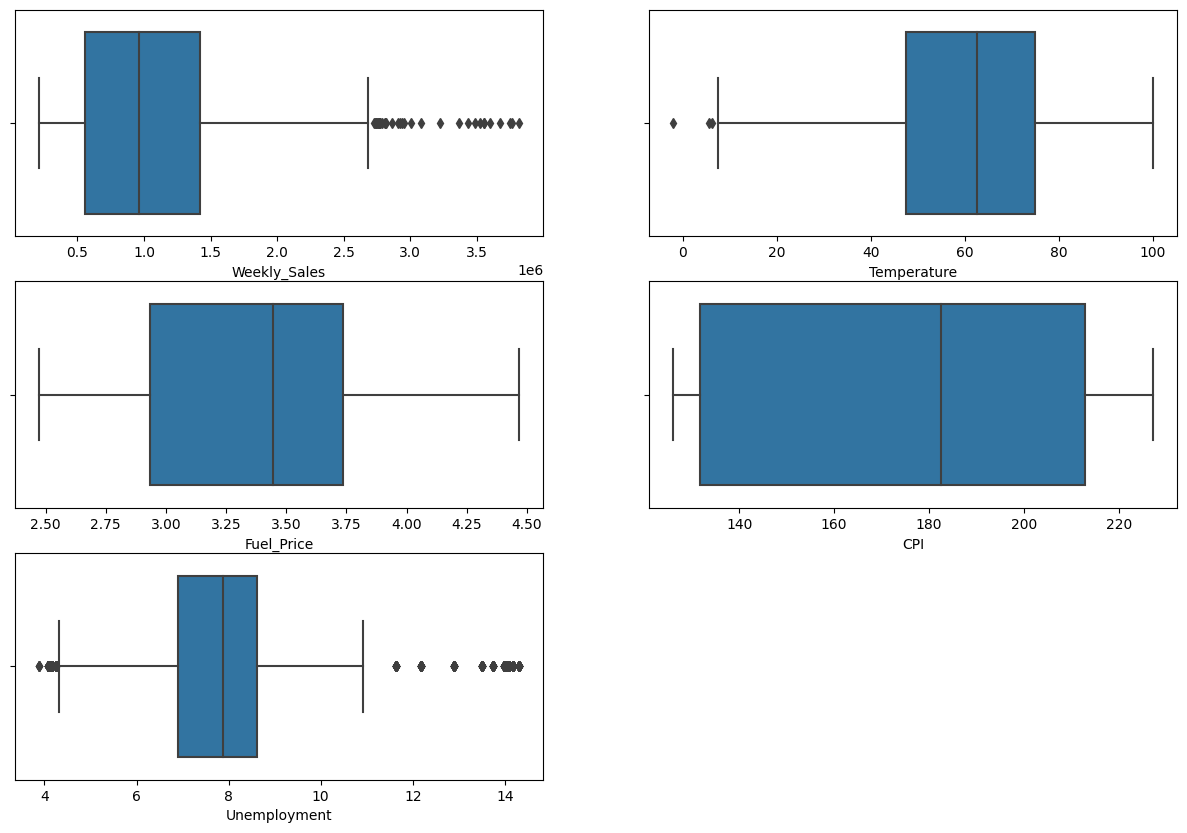

In [20]:
#checking outliers with the Boxplot

n = 1
cols =["Weekly_Sales","Temperature","Fuel_Price","CPI","Unemployment"]
plt.figure(figsize=(15,10))
for i in cols:
        if n<=5:
            plt.subplot(3,2,n);
            n+=1
            sns.boxplot(x = data[i])
            plt.xlabel(i)

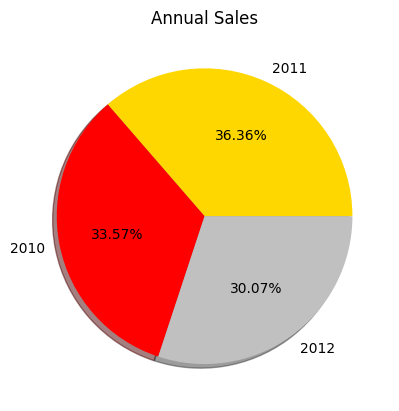

In [21]:
plt.pie(data['Year'].value_counts().values,labels =data['Year'].value_counts().index,
       autopct='%1.2f%%',shadow=True,colors=['gold','red',"silver"])
plt.title('Annual Sales')
plt.show()

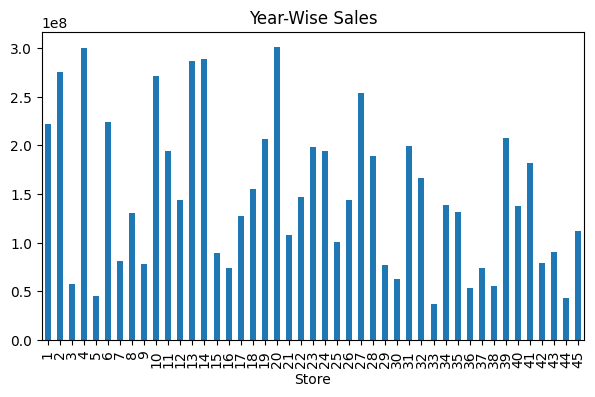

In [22]:
plt.figure(figsize=(7,4))

data.groupby('Store')['Weekly_Sales'].sum().plot(kind='bar')
plt.title('Year-Wise Sales')

plt.show()

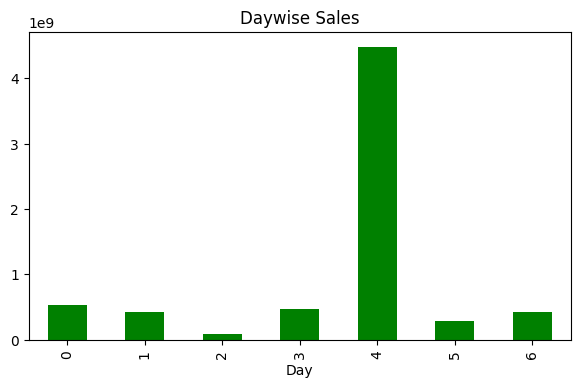

In [23]:
plt.figure(figsize=(7,4))

data.groupby(['Day'])['Weekly_Sales'].sum().plot(kind='bar',color='Green')
plt.title('Daywise Sales')

plt.show()

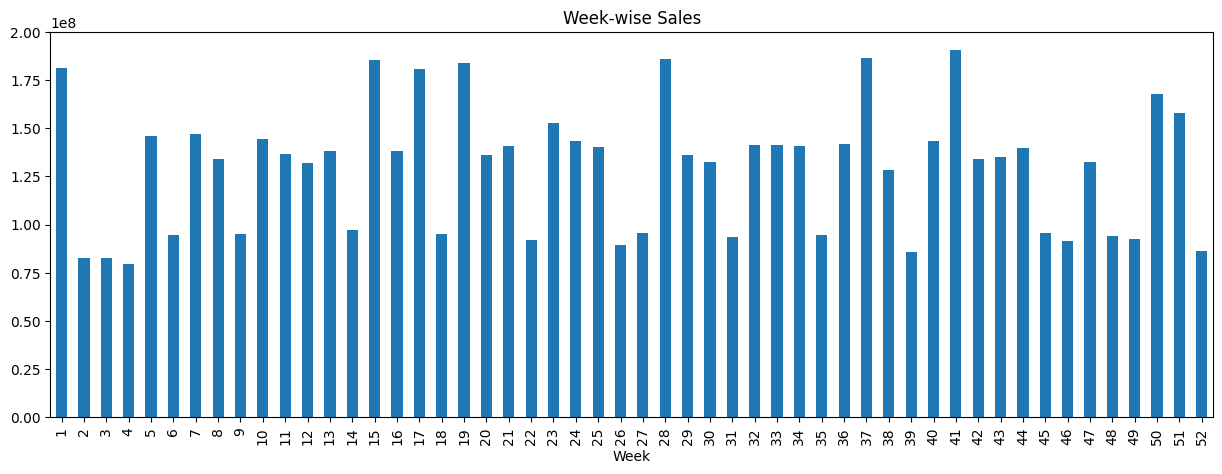

In [24]:
plt.figure(figsize=(15,5))

data.groupby(['Week'])['Weekly_Sales'].sum().plot(kind='bar')
plt.title('Week-wise Sales')

plt.show()

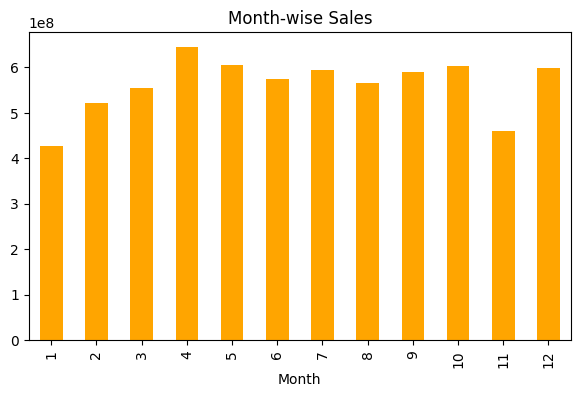

In [25]:
plt.figure(figsize=(7,4))

data.groupby('Month')['Weekly_Sales'].sum().plot(kind='bar',color='Orange')
plt.title('Month-wise Sales')

plt.show()

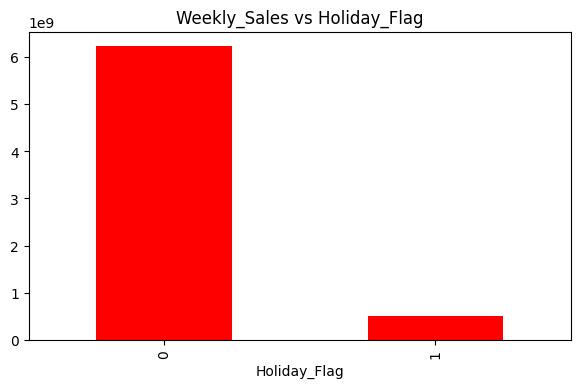

In [26]:

plt.figure(figsize=(7,4))

data.groupby('Holiday_Flag')['Weekly_Sales'].sum().plot(kind='bar',color='red')
plt.title('Weekly_Sales vs Holiday_Flag')

plt.show()

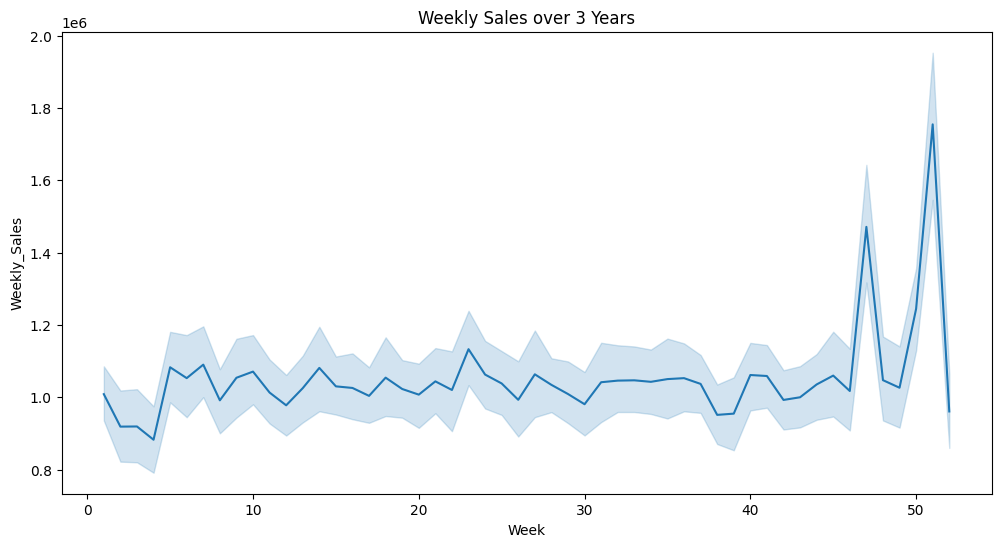

In [27]:
plt.figure(figsize=(12,6))
sns.lineplot(x=data["Week"],y=data['Weekly_Sales']);
plt.title('Weekly Sales over 3 Years');

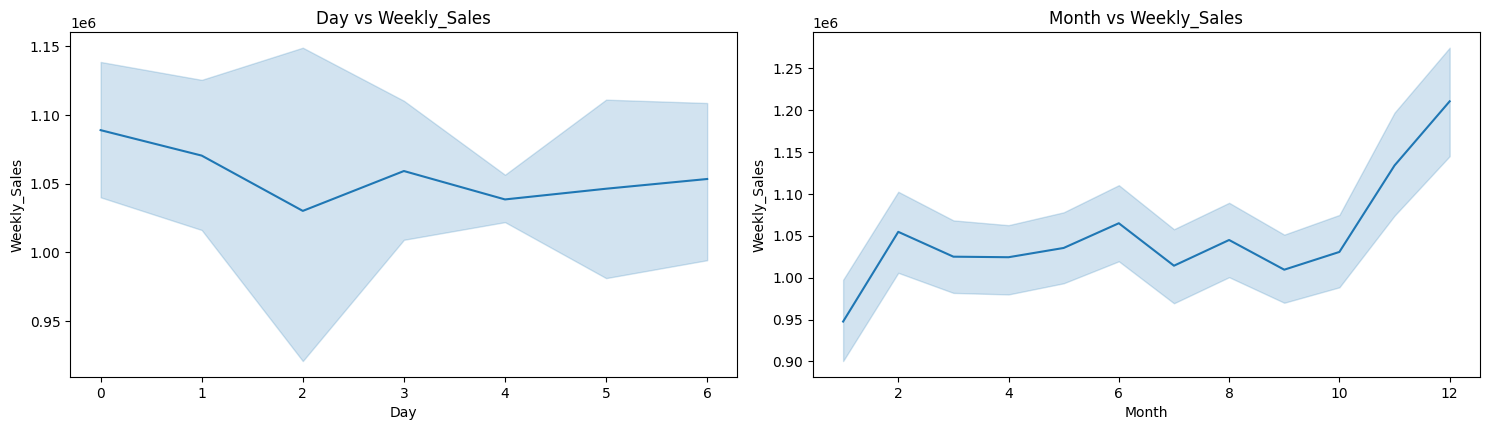

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 8))

plt.subplot(221)
sns.lineplot(data=data, x='Day', y='Weekly_Sales')
plt.xlabel('Day')
plt.ylabel('Weekly_Sales')
plt.title('Day vs Weekly_Sales')

plt.subplot(222)
sns.lineplot(data=data, x='Month', y='Weekly_Sales')
plt.xlabel('Month')
plt.ylabel('Weekly_Sales')
plt.title('Month vs Weekly_Sales')
plt.tight_layout()
plt.show()


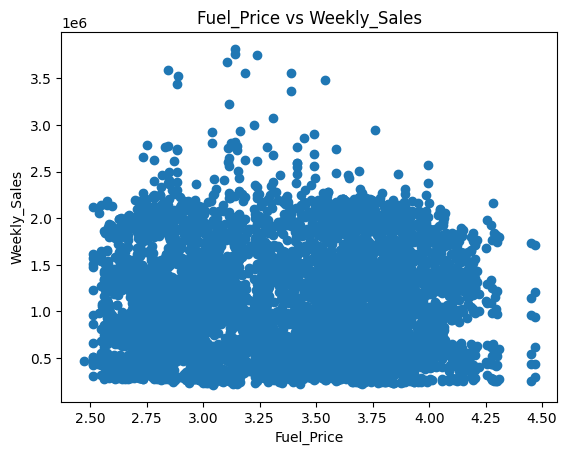

In [29]:
import matplotlib.pyplot as plt

# Sample data
x = data['Fuel_Price']
y = data['Weekly_Sales']

# Create a scatter plot
plt.scatter(x, y)

# Adding labels and title
plt.xlabel('Fuel_Price')
plt.ylabel('Weekly_Sales')
plt.title('Fuel_Price vs Weekly_Sales')

# Display the plot
plt.show()


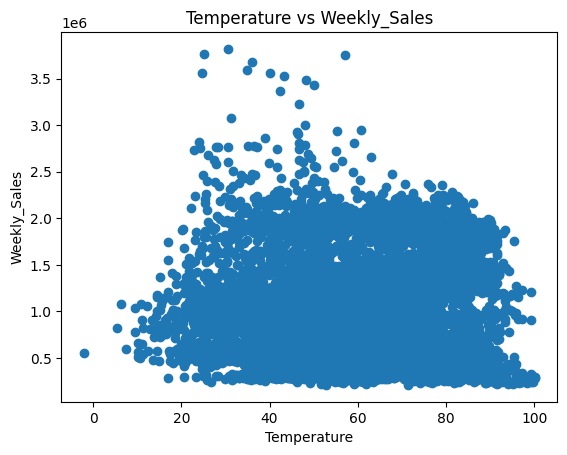

In [30]:
import matplotlib.pyplot as plt

# Sample data
x = data['Temperature']
y = data['Weekly_Sales']

# Create a scatter plot
plt.scatter(x, y)

# Adding labels and title
plt.xlabel('Temperature')
plt.ylabel('Weekly_Sales')
plt.title('Temperature vs Weekly_Sales')

# Display the plot
plt.show()


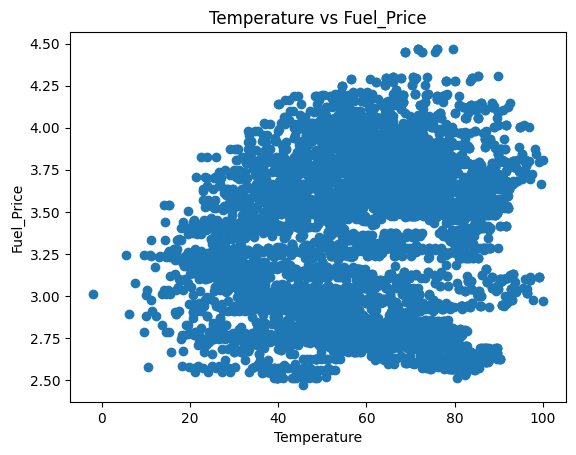

In [31]:

# Sample data
x = data['Temperature']
y = data['Fuel_Price']

# Create a scatter plot
plt.scatter(x, y)

# Adding labels and title
plt.xlabel('Temperature')
plt.ylabel('Fuel_Price')
plt.title('Temperature vs Fuel_Price')

# Display the plot
plt.show()


In [32]:
data

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Week,Month,Year
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,6,17,5,2010
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,3,48,12,2010
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,4,7,2,2010
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,4,8,2,2010
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,0,18,5,2010
...,...,...,...,...,...,...,...,...,...,...,...
6430,45,713173.95,0,64.88,3.997,192.013558,8.684,4,39,9,2012
6431,45,733455.07,0,64.89,3.985,192.170412,8.667,3,19,5,2012
6432,45,734464.36,0,54.47,4.000,192.327265,8.667,0,50,12,2012
6433,45,718125.53,0,56.47,3.969,192.330854,8.667,4,42,10,2012


**Feature Engineering**

In [33]:
import pandas as pd

# Sample DataFrame 'data' containing a 'Month' column
data1= pd.DataFrame({'Month': [12, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]})

# Define a function to categorize months into 'summer' or 'winter'
def categorize_season(month):
    if month in [11,12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'  # You can choose to categorize other months as 'other' or handle them differently.

# Create a new column 'Season' based on the 'Month' column
data['Season'] = data['Month'].apply(categorize_season)

# Print the updated DataFrame
print(data1)


    Month
0      12
1       1
2       2
3       3
4       4
5       5
6       6
7       7
8       8
9       9
10     10
11     11


In [34]:
data

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Week,Month,Year,Season
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,6,17,5,2010,Spring
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,3,48,12,2010,Winter
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,4,7,2,2010,Winter
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,4,8,2,2010,Winter
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,0,18,5,2010,Spring
...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,713173.95,0,64.88,3.997,192.013558,8.684,4,39,9,2012,Autumn
6431,45,733455.07,0,64.89,3.985,192.170412,8.667,3,19,5,2012,Spring
6432,45,734464.36,0,54.47,4.000,192.327265,8.667,0,50,12,2012,Winter
6433,45,718125.53,0,56.47,3.969,192.330854,8.667,4,42,10,2012,Autumn


<ipython-input-35-2816e71c064b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


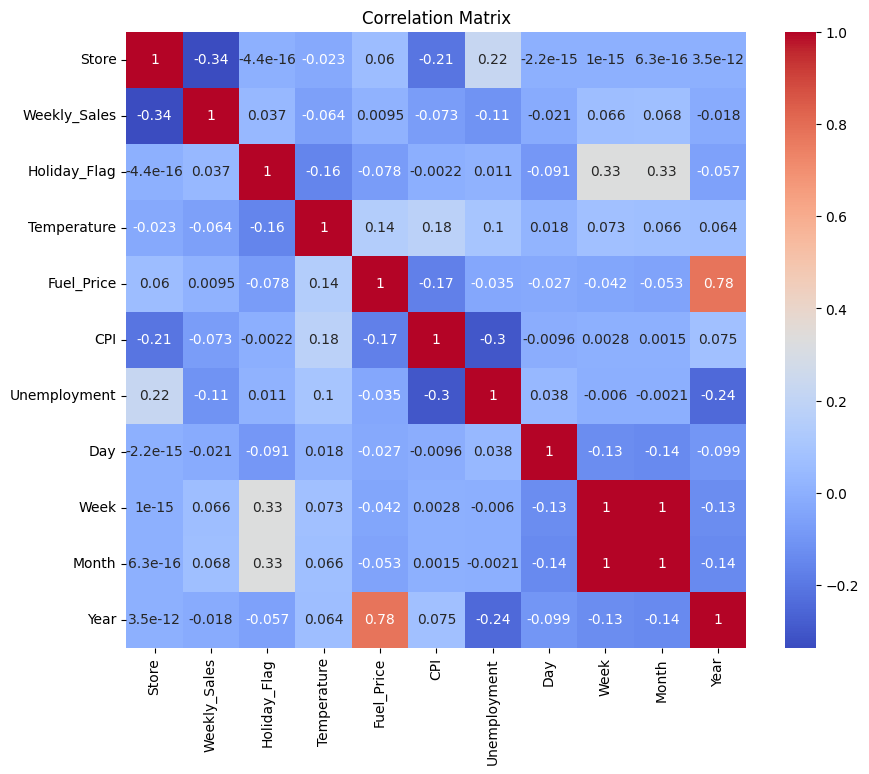

In [35]:
## Compute the correlation matrix
corr = data.corr()

# Create a heatmap of the correlation matrix
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', ax=ax)
ax.set_title('Correlation Matrix')
plt.show()

In [36]:
data['Season'].value_counts()

Winter    1845
Spring    1755
Summer    1665
Autumn    1170
Name: Season, dtype: int64

**Ordinal Encode**

In [37]:
data['Season'] = data['Season'].map({'Winter':0,'Spring':1,'Summer':2,'Autumn':3})

In [38]:
data

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Week,Month,Year,Season
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,6,17,5,2010,1
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,3,48,12,2010,0
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,4,7,2,2010,0
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,4,8,2,2010,0
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,0,18,5,2010,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,713173.95,0,64.88,3.997,192.013558,8.684,4,39,9,2012,3
6431,45,733455.07,0,64.89,3.985,192.170412,8.667,3,19,5,2012,1
6432,45,734464.36,0,54.47,4.000,192.327265,8.667,0,50,12,2012,0
6433,45,718125.53,0,56.47,3.969,192.330854,8.667,4,42,10,2012,3


In [39]:
X=data.drop('Weekly_Sales', axis=1)
y=data['Weekly_Sales']

**Split The Data**

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [41]:
from sklearn.preprocessing import StandardScaler
# Instantiate the StandardScaler
scaler = StandardScaler()
# Fit the scaler to the training data and transform the training and testing data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Linear regression





In [42]:
from sklearn.linear_model import LinearRegression #import
linear_model = LinearRegression(fit_intercept=True) #initialise
linear_model.fit(X_train,y_train) #fit - all magic
print(linear_model.predict(X_test))     #predict
print(y_test)


[1337292.99995648 1097241.74763098 1252812.4056487  1237459.89405903
  703609.43604728  926728.04287545  904869.06097466 1178786.9831102
  992351.00726702 1171466.5273045  1172926.88151201 1134920.79374166
 1446861.76044619 1259647.10917224 1134246.3017288  1046493.82989564
 1212918.77656205 1046393.83099002  816120.44203    1194185.78588742
  652336.2216413   761843.03870852 1427655.84569754  943811.09269586
 1189347.86006862 1590390.62763675 1148732.79437142 1339968.45848749
  876456.20017653 1059164.01574452  902700.68364483 1240581.55184374
 1109880.05420392  754372.95832924 1224274.20118398  917218.60434049
  981521.57992277 1229138.93104226 1484921.17387892 1258472.74994006
  911051.69841016  938277.90817517  809867.94233825 1101476.26569972
 1159449.30348702 1084584.38824638 1242780.67573235 1243512.65246136
 1297068.38345297  798695.09056351 1340393.57336862 1225770.9596401
 1103810.95977868  791147.31508319 1237784.35471761  794538.60251416
 1362255.36451136 1088933.80143434 1

In [43]:
linear_model.score(X_test, y_test)

0.1602636949453604

In [44]:
from sklearn.model_selection import cross_val_score
# synatx : cross_val_score(model, fts_train, target_train, bins).mean()
cross_val_linear_model=cross_val_score(linear_model,X_train,y_train,cv=10).mean()
cross_val_linear_model

0.14384456200661674

# Decision Tree Regression

# Choosing the best of depth Value

In [45]:

from sklearn.tree import DecisionTreeRegressor

max_depth=np.arange(1,20)
cross_val_dt=[]
for d in max_depth:
  dt_regressor= DecisionTreeRegressor(max_depth=d, random_state=0)
  dt_regressor.fit(X_train,y_train)
  print("Depth : ", d, " train Score  : ", dt_regressor.score(X_train,y_train), "cross_val_score : ", cross_val_score(dt_regressor,X_train,y_train,cv = 10).mean())
  cross_val_dt.append(cross_val_score(dt_regressor,X_train,y_train,cv = 10).mean())

Depth :  1  train Score  :  0.1570218908182368 cross_val_score :  0.15537953548142588
Depth :  2  train Score  :  0.2526529495204106 cross_val_score :  0.24964696804538566
Depth :  3  train Score  :  0.44383958934949264 cross_val_score :  0.44024348579369443
Depth :  4  train Score  :  0.6184459542896076 cross_val_score :  0.6166042366090256
Depth :  5  train Score  :  0.6993447051955564 cross_val_score :  0.6856811638040585
Depth :  6  train Score  :  0.7911376299618785 cross_val_score :  0.7659887146028383
Depth :  7  train Score  :  0.8801084704465809 cross_val_score :  0.8345518450699088
Depth :  8  train Score  :  0.9310144090868054 cross_val_score :  0.8873602357305963
Depth :  9  train Score  :  0.9604009070100743 cross_val_score :  0.9187636288338809
Depth :  10  train Score  :  0.9779321594668663 cross_val_score :  0.9288143329198408
Depth :  11  train Score  :  0.9855264176721638 cross_val_score :  0.9290582847837905
Depth :  12  train Score  :  0.9904867520581215 cross_val_s

In [46]:
cross_val_dt_regressor=max(cross_val_dt)
cross_val_dt_regressor


0.9318574875676499

In [47]:
print("The best depth is 13 and Cross_val_score is:",cross_val_dt_regressor)

The best depth is 13 and Cross_val_score is: 0.9318574875676499


# Implementing Decision Tree Regression

In [48]:
dt_regressor=DecisionTreeRegressor(max_depth=13, random_state=42)
dt_regressor.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=13, random_state=42)

In [50]:
dtr = DecisionTreeRegressor(max_depth = 13, random_state = 42)
dtr.fit(X_train, y_train)
train_score = dtr.score(X_train, y_train)
test_score = dtr.score(X_test, y_test)
print(train_score)
print(test_score)

0.993543241728589
0.9256601356676765


In [51]:

cross_val_dt_regressor=cross_val_score(dt_regressor,X_train,y_train,cv=10).mean()
cross_val_dt_regressor

0.9264732223527314

# Importance Feature

In [54]:
ftImp = list(zip(dt_regressor.feature_importances_, data.columns[:-1]))
imp = pd.DataFrame(ftImp, columns = ["Importance","Feature"])
imp.sort_values("Importance",ascending = False,inplace=True)
imp

,Importance,Feature
0,0.632480,Store
4,0.159367,Fuel_Price
5,0.126613,CPI
7,0.039427,Day
2,0.015452,Holiday_Flag
3,0.013648,Temperature
6,0.007265,Unemployment
8,0.002529,Week
9,0.001515,Month
1,0.001372,Weekly_Sales


# Random Forest Regression

# Choosing the best depth value

In [55]:
from sklearn.ensemble import RandomForestRegressor

max_depth=np.array([2,4,8,10,12,14,16,18])
cross_val_rf=[]
for d in max_depth:
  rf_regressor=RandomForestRegressor(max_depth=d, random_state=0)
  rf_regressor.fit(X_train,y_train)
  print("Depth : ", d, "cross_val_score : ", cross_val_score(rf_regressor,X_train,y_train,cv = 10).mean())
  cross_val_rf.append(cross_val_score(rf_regressor,X_train,y_train,cv = 10).mean())

Depth :  2 cross_val_score :  0.2535768292121301
Depth :  4 cross_val_score :  0.618666329162631
Depth :  8 cross_val_score :  0.9232073355508769
Depth :  10 cross_val_score :  0.9515783378817904
Depth :  12 cross_val_score :  0.9556448378441729
Depth :  14 cross_val_score :  0.9566010864762161
Depth :  16 cross_val_score :  0.956813939355974
Depth :  18 cross_val_score :  0.9572678305533213


In [56]:
cross_val_rf_regressor=max(cross_val_rf)
cross_val_rf_regressor

0.9572678305533213

In [57]:
print("The best depth is 18and Cross_val_score is:",cross_val_rf_regressor)

The best depth is 18and Cross_val_score is: 0.9572678305533213


# Implementing Random Forest Regression

In [58]:
rf_regressor=RandomForestRegressor(max_depth=18, random_state=42)
rf_regressor.fit(X_train,y_train)

RandomForestRegressor(max_depth=18, random_state=42)

In [59]:
rfr = RandomForestRegressor( max_depth =18,random_state = 0)
rfr.fit(X_train, y_train)
print(rfr.score(X_train, y_train))
print(rfr.score(X_test, y_test))


0.9938462080909111
0.9484181969399638


In [60]:
cross_val_rf_regressor=cross_val_score(rf_regressor,X_train,y_train,cv=15).mean()
cross_val_rf_regressor

0.9569615586198776

# K Nearest Neighbor Regression

# Choosing the best K(neighbor) Value

In [61]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_values=np.arange(1,50)
cross_val_knn=[]
for k in knn_values:
  knn_regressor=KNeighborsRegressor(n_neighbors=k)
  knn_regressor.fit(X_train_scaled,y_train)
  print("K value : ", k, " train score : ", knn_regressor.score(X_train_scaled,y_train)  ,"cross_val_score : ", cross_val_score(knn_regressor,X_train_scaled,y_train,cv = 10).mean())
  cross_val_knn.append(cross_val_score(knn_regressor,X_train_scaled,y_train,cv = 10).mean())

K value :  1  train score :  1.0 cross_val_score :  -0.04669662590268796
K value :  2  train score :  0.7425893853125181 cross_val_score :  0.21939952983164349
K value :  3  train score :  0.6642538789540233 cross_val_score :  0.26259039617014923
K value :  4  train score :  0.5949418948186094 cross_val_score :  0.2911341104947446
K value :  5  train score :  0.5577677488178745 cross_val_score :  0.2838238434489441
K value :  6  train score :  0.5166779363350639 cross_val_score :  0.28423222576379936
K value :  7  train score :  0.4887845164870952 cross_val_score :  0.28178972725057605
K value :  8  train score :  0.4603569365244877 cross_val_score :  0.2808674017176258
K value :  9  train score :  0.44288752304299317 cross_val_score :  0.2852639547330746
K value :  10  train score :  0.4284430494103407 cross_val_score :  0.2870736920410535
K value :  11  train score :  0.4160702495243621 cross_val_score :  0.28526236809310895
K value :  12  train score :  0.4055818479367992 cross_val_

In [62]:
cross_val_knn_regressor=max(cross_val_knn)
cross_val_knn_regressor

0.2911341104947446

In [63]:
print("The best K-Value is 4 and Cross_val_score is",cross_val_knn_regressor )

The best K-Value is 4 and Cross_val_score is 0.2911341104947446


# Implementing K Nearest Neighbor Regression

In [64]:
knn_regressor=KNeighborsRegressor(n_neighbors=4)
knn_regressor.fit(X_train_scaled,y_train)

KNeighborsRegressor(n_neighbors=4)

In [65]:
cross_val_knn_regressor=cross_val_score(knn_regressor,X_train_scaled,y_train,cv=15).mean()
cross_val_knn_regressor

0.2981515674929571

# Extreme Gradient Boosting Regression

# Choosing the best Learning Rate

In [66]:
import xgboost as xgb

cross_val_xgb=[]
for lr in [0.01,0.05,0.08,0.1,0.2,0.25,0.3]:
  xgb_regressor= xgb.XGBRegressor(learning_rate = lr,n_estimators=100)
  xgb_regressor.fit(X_train,y_train)
  print("Learning rate : ", lr,"cross_val_score:", cross_val_score(xgb_regressor,X_train,y_train,cv = 15).mean())
  cross_val_xgb.append(cross_val_score(xgb_regressor,X_train,y_train,cv = 15).mean())

Learning rate :  0.01 cross_val_score: 0.7499894306895162
Learning rate :  0.05 cross_val_score: 0.9542923178236684
Learning rate :  0.08 cross_val_score: 0.966228289557926
Learning rate :  0.1 cross_val_score: 0.9699468992011646
Learning rate :  0.2 cross_val_score: 0.9752522352684425
Learning rate :  0.25 cross_val_score: 0.9759399150604166
Learning rate :  0.3 cross_val_score: 0.9754298911081574


In [67]:
cross_val_xgb_regressor=max(cross_val_xgb)
cross_val_xgb_regressor

0.9759399150604166

In [68]:
print("The best Learning rate is 0.25 and Cross_val_score is:",cross_val_xgb_regressor)


The best Learning rate is 0.25 and Cross_val_score is: 0.9759399150604166


# Implementing Extreme Gradient Boosting Regression

In [69]:
  xgb_regressor= xgb.XGBRegressor(learning_rate =0.25,n_estimators=100) # initialise the model
  xgb_regressor.fit(X_train,y_train) #train the model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.25, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [72]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(n_estimators = 100, learning_rate = 0.25,random_state = 0)
gbr.fit(X_train, y_train)
print(gbr.score(X_train, y_train))
print(gbr.score(X_test, y_test))

0.970642386879428
0.9623924020776606


In [73]:
cross_val_xgb_regressor=cross_val_score(xgb_regressor,X_train,y_train,cv=15).mean()
cross_val_xgb_regressor

0.9759399150604166

# Cross-Validation Score for Machine-Learning Models

In [75]:
print("Cross Validation Score for Linear Regression Model:",cross_val_linear_model)
print("Cross Validation Score for K-Nearest Neighbors Regression Model:",cross_val_knn_regressor)
print("Cross Validation Score for Decision Tree Regression Model: ",cross_val_dt_regressor)
print("Cross Validation Score for Random Forest Regression Model: ",cross_val_rf_regressor)
print("Cross Validation Score for Extreme-Gradient Boosting Regression Model: ",cross_val_xgb_regressor)

Cross Validation Score for Linear Regression Model: 0.14384456200661674
Cross Validation Score for K-Nearest Neighbors Regression Model: 0.2981515674929571
Cross Validation Score for Decision Tree Regression Model:  0.9264732223527314
Cross Validation Score for Random Forest Regression Model:  0.9569615586198776
Cross Validation Score for Extreme-Gradient Boosting Regression Model:  0.9759399150604166


# R2 Score for Machine-Learning Models

In [76]:
from sklearn.metrics import r2_score

In [77]:
y_pred_lr=linear_model.predict(X_test)
y_pred_knn=knn_regressor.predict(X_test)
y_pred_dt= dt_regressor.predict(X_test)
y_pred_rf=rf_regressor.predict(X_test)
y_pred_xgb=xgb_regressor.predict(X_test)

In [78]:
R2_score_lr=r2_score(y_test,y_pred_lr)
R2_score_knn=r2_score(y_test,y_pred_knn)
R2_score_dt=r2_score(y_test,y_pred_dt)
R2_score_rf=r2_score(y_test,y_pred_rf)
R2_score_xgb=r2_score(y_test,y_pred_xgb)

In [79]:

print("R2 Score for K-Nearest Neighbors Regression Model:",R2_score_knn)
print("R2 Score for Decision Tree Regression Model: ",R2_score_dt)
print("R2 Score for Random Forest Regression Model: ",R2_score_rf)
print("R2 Score for Extreme-Gradient Boosting Regression Model: ",R2_score_xgb)

R2 Score for K-Nearest Neighbors Regression Model: 0.3067396530629961
R2 Score for Decision Tree Regression Model:  0.9256601356676765
R2 Score for Random Forest Regression Model:  0.9475859114741351
R2 Score for Extreme-Gradient Boosting Regression Model:  0.9779746546958284


# The Best Model is Extreme Gradient Boosting Regression : 0.9779746546958284